In [1]:
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import numpy as np

### Dataset: VHM Historical Data

In [2]:
data = pd.read_csv('../Datasets/1 - VHM Historical Data.csv')
data = data.dropna()

data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')
data = data.set_index('Date')
data = data.sort_index()

# Format column "Price", "Open", "High", "Low"
for col in ['Price', 'Open', 'High', 'Low']:
    data[col] = data[col].str.replace(',', '').astype(float)

data

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2019-03-01,68421.0,66541.0,68722.0,65789.0,1.05M,4.00%
2019-03-04,70075.0,69173.0,70300.0,67368.0,1.18M,2.42%
2019-03-05,68421.0,69323.0,69849.0,68045.0,1.50M,-2.36%
2019-03-06,69022.0,68421.0,69097.0,68270.0,770.13K,0.88%
2019-03-07,69173.0,69173.0,71654.0,69097.0,1.70M,0.22%
...,...,...,...,...,...,...
2024-05-27,39800.0,39850.0,40050.0,39750.0,4.62M,0.00%
2024-05-28,39950.0,39850.0,40050.0,39750.0,5.56M,0.38%
2024-05-29,39450.0,40000.0,40100.0,39450.0,8.03M,-1.25%


#### Ratio 7:3

In [3]:
train_size = round(len(data) * 0.7)
test_size = round(len(data) - train_size) 

len(data), train_size, test_size

(1313, 919, 394)

In [4]:
train_data = data[:train_size]
test_data = data[train_size:]

train_data.shape, test_data.shape

((919, 6), (394, 6))

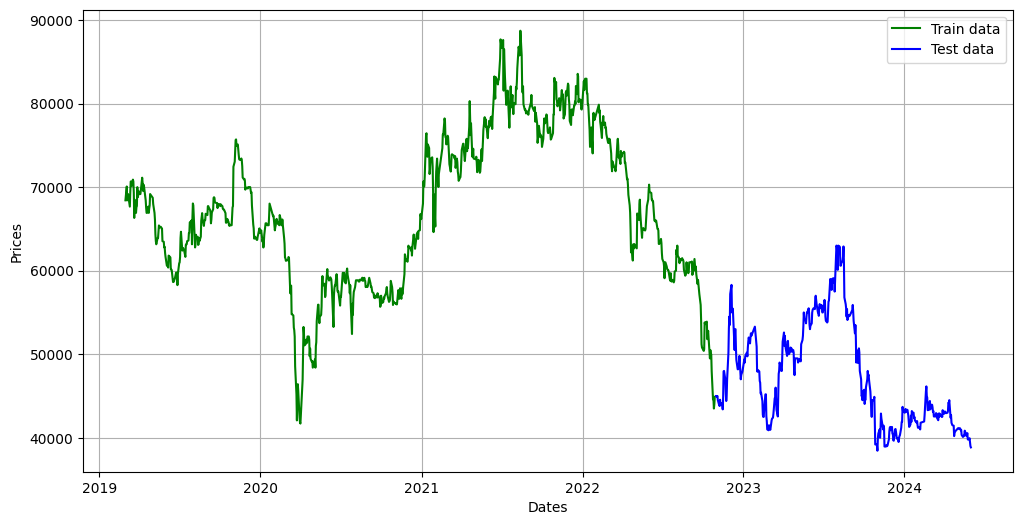

In [5]:
plt.figure(figsize=(12,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(train_data['Price'], 'green', label='Train data')
plt.plot(test_data['Price'], 'blue', label='Test data')
plt.legend()

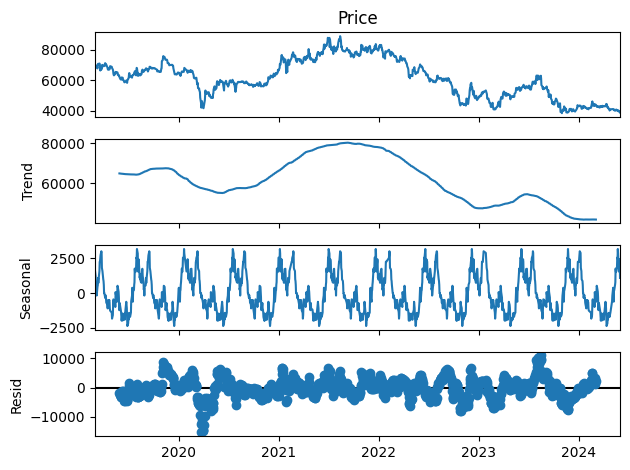

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Perform seasonal decomposition
result = seasonal_decompose(data['Price'], model='additive', period=120).plot();

In [7]:
model = ExponentialSmoothing(np.asarray(train_data['Price']), trend='add', seasonal='add', seasonal_periods=120).fit()

d:\LearnPython\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [8]:
test_data['Price Predicted'] = model.forecast(len(test_data))

C:\Users\KIm Anh\AppData\Local\Temp\ipykernel_18784\2474305646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Price Predicted'] = model.forecast(len(test_data))


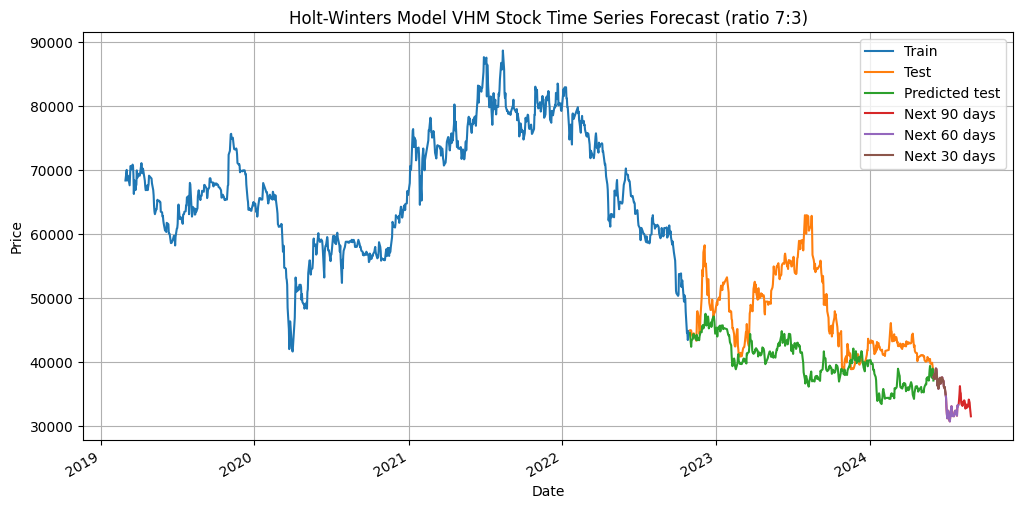

In [9]:
train_data['Price'].plot(legend=True, label='Train', figsize=(12,6))
test_data['Price'].plot(legend=True, label='Test')
test_data['Price Predicted'].plot(legend=True, label='Predicted test')

# Predict prices for the next 30 days
# Generate a range of dates for the next 30 days
next_30_days = pd.date_range(start=test_data.index[-1], periods=30)

# Predict the closing prices for the next 30 days
y_next_30_days = model.forecast(len(next_30_days) + len(test_data))[-30:]

# Predict prices for the next 60 days
next_60_days = pd.date_range(start=test_data.index[-1], periods=60)
y_next_60_days = model.forecast(len(next_60_days) + len(test_data))[-60:]

# Predict prices for the next 90 days
next_90_days = pd.date_range(start=test_data.index[-1], periods=90)
y_next_90_days = model.forecast(len(next_90_days) + len(test_data))[-90:]

plt.plot(next_90_days, y_next_90_days, label='Next 90 days')
plt.plot(next_60_days, y_next_60_days, label='Next 60 days')
plt.plot(next_30_days, y_next_30_days, label='Next 30 days')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Holt-Winters Model VHM Stock Time Series Forecast (ratio 7:3)')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
# Calculate RMSE for the testing set
test_rmse = np.sqrt(np.mean((test_data['Price Predicted'] - test_data['Price'])**2))
print('Testing RMSE:', test_rmse)

# Calculate MAPE for the testing set
test_mape = np.mean(np.abs((test_data['Price'] - test_data['Price Predicted']) / test_data['Price'])) * 100
print("Testing MAPE:", test_mape)

# Calculate MAE for the testing set
test_mae = np.mean(np.abs(test_data['Price Predicted'] - test_data['Price']))
print("Testing MAE:", test_mae)

Testing RMSE: 9208.782162792177
Testing MAPE: 14.431891457003882
Testing MAE: 7290.43214073313


#### Ratio 8:2

In [11]:
train_size = round(len(data) * 0.8)
test_size = round(len(data) - train_size)

len(data), train_size, test_size

(1313, 1050, 263)

In [12]:
train_data = data[:train_size+1]
test_data = data[train_size:]

train_data.shape, test_data.shape

((1051, 6), (263, 6))

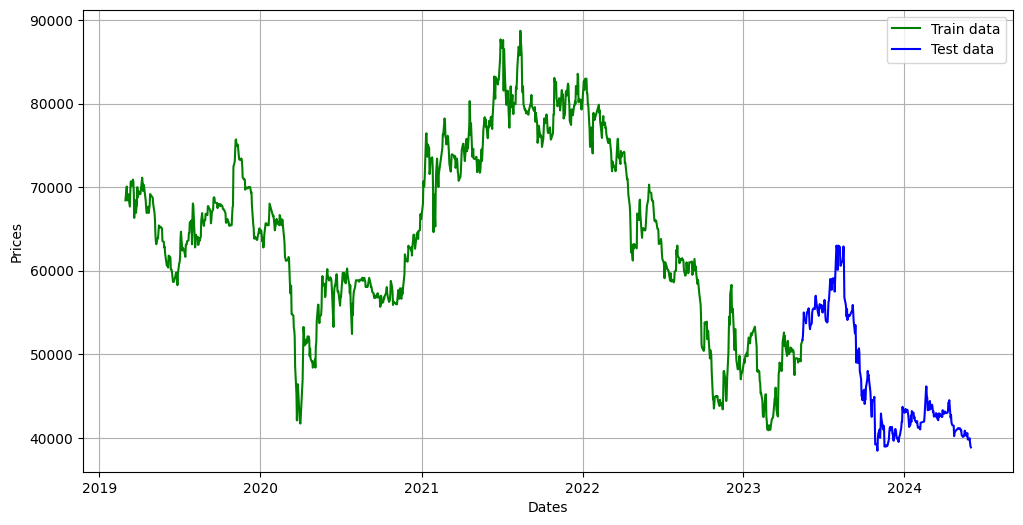

In [13]:
plt.figure(figsize=(12,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(train_data['Price'], 'green', label='Train data')
plt.plot(test_data['Price'], 'blue', label='Test data')
plt.legend()

In [14]:
model = ExponentialSmoothing(np.asarray(train_data['Price']), trend='add', seasonal='add', seasonal_periods=120).fit()

d:\LearnPython\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [15]:
test_data['Price Predicted'] = model.forecast(len(test_data))

C:\Users\KIm Anh\AppData\Local\Temp\ipykernel_18784\2474305646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Price Predicted'] = model.forecast(len(test_data))


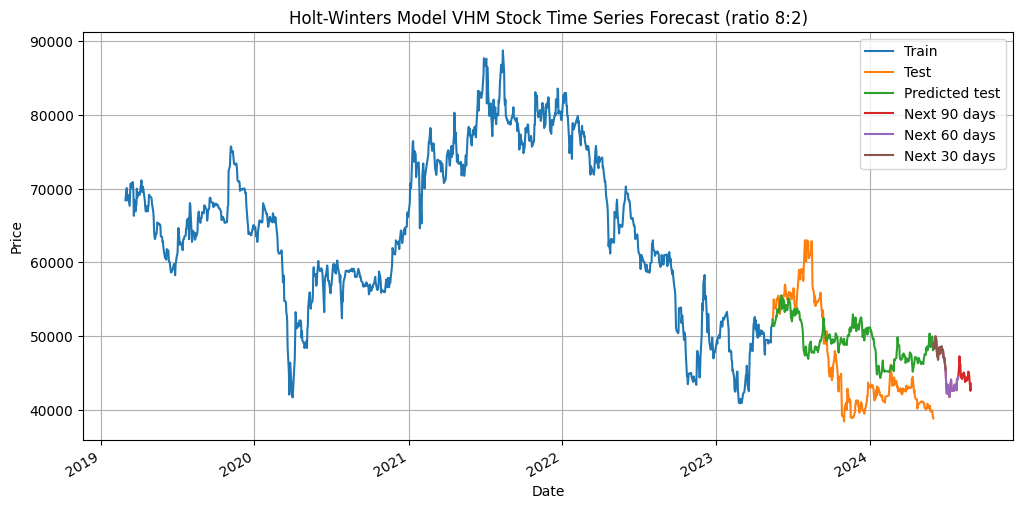

In [16]:
train_data['Price'].plot(legend=True, label='Train', figsize=(12,6))
test_data['Price'].plot(legend=True, label='Test')
test_data['Price Predicted'].plot(legend=True, label='Predicted test')

# Predict prices for the next 30 days
# Generate a range of dates for the next 30 days
next_30_days = pd.date_range(start=test_data.index[-1], periods=30)

# Predict the closing prices for the next 30 days
y_next_30_days = model.forecast(len(next_30_days) + len(test_data))[-30:]

# Predict prices for the next 60 days
next_60_days = pd.date_range(start=test_data.index[-1], periods=60)
y_next_60_days = model.forecast(len(next_60_days) + len(test_data))[-60:]

# Predict prices for the next 90 days
next_90_days = pd.date_range(start=test_data.index[-1], periods=90)
y_next_90_days = model.forecast(len(next_90_days) + len(test_data))[-90:]

plt.plot(next_90_days, y_next_90_days, label='Next 90 days')
plt.plot(next_60_days, y_next_60_days, label='Next 60 days')
plt.plot(next_30_days, y_next_30_days, label='Next 30 days')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Holt-Winters Model VHM Stock Time Series Forecast (ratio 8:2)')
plt.legend()
plt.grid(True)
plt.show()

In [17]:
# Calculate RMSE for the testing set
test_rmse = np.sqrt(np.mean((test_data['Price Predicted'] - test_data['Price'])**2))
print('Testing RMSE:', test_rmse)

# Calculate MAPE for the testing set
test_mape = np.mean(np.abs((test_data['Price'] - test_data['Price Predicted']) / test_data['Price'])) * 100
print("Testing MAPE:", test_mape)

# Calculate MAE for the testing set
test_mae = np.mean(np.abs(test_data['Price Predicted'] - test_data['Price']))
print("Testing MAE:", test_mae)

Testing RMSE: 6900.8122145263915
Testing MAPE: 12.770930053025111
Testing MAE: 5772.0478426216405


#### Ratio 9:1

In [18]:
train_size = round(len(data) * 0.9)
test_size = round(len(data) - train_size)

len(data), train_size, test_size

(1313, 1182, 131)

In [19]:
train_data = data[:train_size+1]
test_data = data[train_size:]

train_data.shape, test_data.shape

((1183, 6), (131, 6))

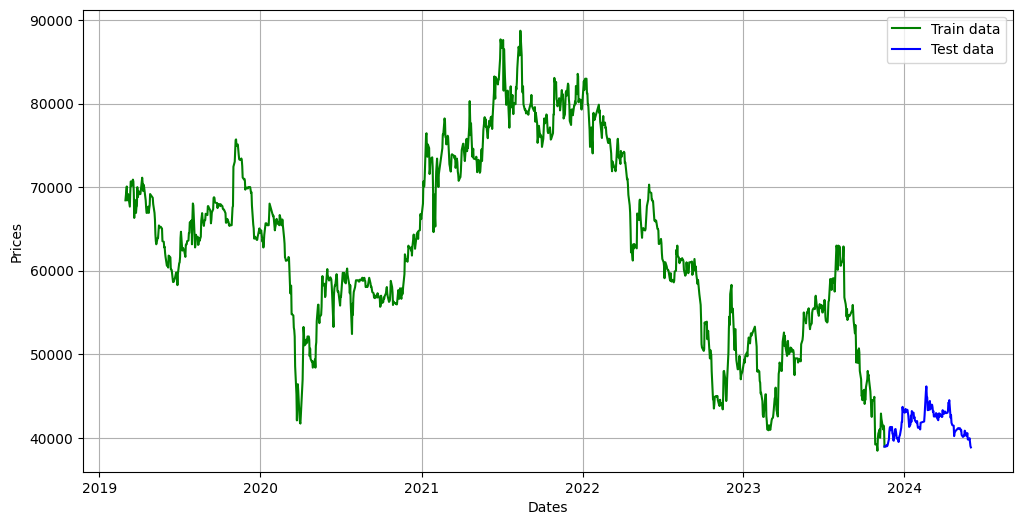

In [20]:
plt.figure(figsize=(12,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(train_data['Price'], 'green', label='Train data')
plt.plot(test_data['Price'], 'blue', label='Test data')
plt.legend()

In [21]:
model = ExponentialSmoothing(np.asarray(train_data['Price']), trend='add', seasonal='add', seasonal_periods=120).fit()

d:\LearnPython\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [22]:
test_data['Price Predicted'] = model.forecast(len(test_data))

C:\Users\KIm Anh\AppData\Local\Temp\ipykernel_18784\2474305646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Price Predicted'] = model.forecast(len(test_data))


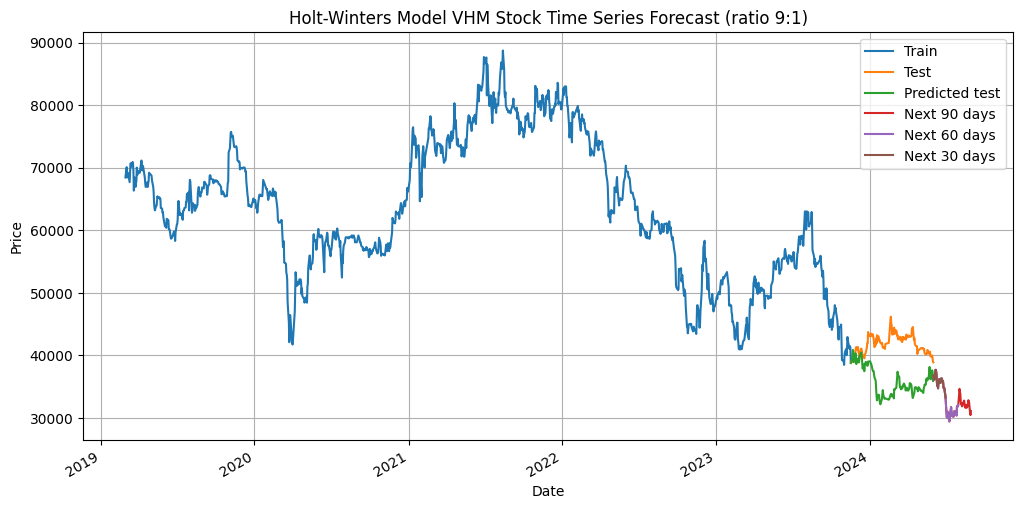

In [23]:
train_data['Price'].plot(legend=True, label='Train', figsize=(12,6))
test_data['Price'].plot(legend=True, label='Test')
test_data['Price Predicted'].plot(legend=True, label='Predicted test')

# Predict prices for the next 30 days
# Generate a range of dates for the next 30 days
next_30_days = pd.date_range(start=test_data.index[-1], periods=30)

# Predict the closing prices for the next 30 days
y_next_30_days = model.forecast(len(next_30_days) + len(test_data))[-30:]

# Predict prices for the next 60 days
next_60_days = pd.date_range(start=test_data.index[-1], periods=60)
y_next_60_days = model.forecast(len(next_60_days) + len(test_data))[-60:]

# Predict prices for the next 90 days
next_90_days = pd.date_range(start=test_data.index[-1], periods=90)
y_next_90_days = model.forecast(len(next_90_days) + len(test_data))[-90:]

plt.plot(next_90_days, y_next_90_days, label='Next 90 days')
plt.plot(next_60_days, y_next_60_days, label='Next 60 days')
plt.plot(next_30_days, y_next_30_days, label='Next 30 days')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Holt-Winters Model VHM Stock Time Series Forecast (ratio 9:1)')
plt.legend()
plt.grid(True)
plt.show()

In [24]:
# Calculate RMSE for the testing set
test_rmse = np.sqrt(np.mean((test_data['Price Predicted'] - test_data['Price'])**2))
print('Testing RMSE:', test_rmse)

# Calculate MAPE for the testing set
test_mape = np.mean(np.abs((test_data['Price'] - test_data['Price Predicted']) / test_data['Price'])) * 100
print("Testing MAPE:", test_mape)

# Calculate MAE for the testing set
test_mae = np.mean(np.abs(test_data['Price Predicted'] - test_data['Price']))
print("Testing MAE:", test_mae)

Testing RMSE: 6700.394468011539
Testing MAPE: 13.890447068257568
Testing MAE: 5892.015319823175


### Dataset: NVL Historical Data

In [25]:
data = pd.read_csv('../Datasets/2 - NVL Historical Data.csv')
data = data.dropna()

data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')
data = data.set_index('Date')
data = data.sort_index()

# Format column "Price", "Open", "High", "Low"
for col in ['Price', 'Open', 'High', 'Low']:
    data[col] = data[col].str.replace(',', '').astype(float)

data

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2019-03-01,32933.0,31765.0,32933.0,31765.0,891.22K,2.95%
2019-03-04,33100.0,32933.0,33378.0,32600.0,899.13K,0.51%
2019-03-05,32711.0,32989.0,33211.0,32544.0,963.79K,-1.18%
2019-03-06,31709.0,32711.0,32711.0,31487.0,1.58M,-3.06%
2019-03-07,31932.0,31709.0,32210.0,31709.0,849.59K,0.70%
...,...,...,...,...,...,...
2024-05-27,14500.0,14600.0,14600.0,14300.0,7.87M,0.35%
2024-05-28,14500.0,14500.0,14600.0,14350.0,11.43M,0.00%
2024-05-29,14150.0,14550.0,14550.0,14150.0,15.86M,-2.41%


#### Ratio 7:3

In [26]:
train_size = round(len(data) * 0.7)
test_size = round(len(data) - train_size)

len(data), train_size, test_size

(1313, 919, 394)

In [27]:
train_data = data[:train_size+1]
test_data = data[train_size:train_size+test_size]

train_data.shape, test_data.shape

((920, 6), (394, 6))

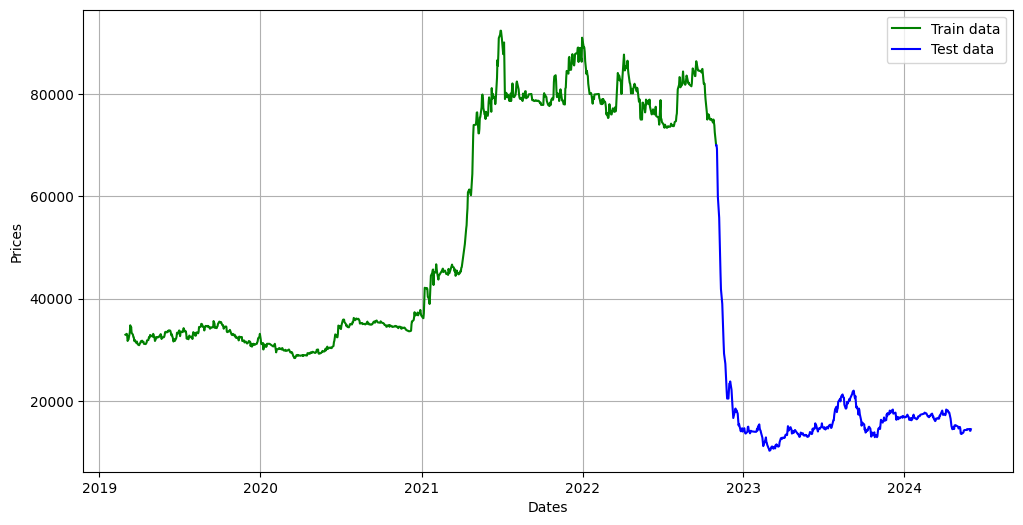

In [28]:
plt.figure(figsize=(12,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(train_data['Price'], 'green', label='Train data')
plt.plot(test_data['Price'], 'blue', label='Test data')
plt.legend()

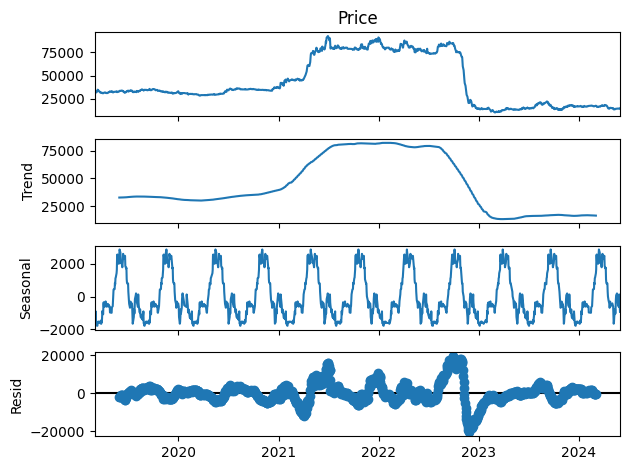

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Perform seasonal decomposition
result = seasonal_decompose(data['Price'], model='additive', period=120).plot();

In [30]:
model = ExponentialSmoothing(np.asarray(train_data['Price']), trend='add', seasonal='add', seasonal_periods=120).fit()

d:\LearnPython\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [31]:
test_data['Price Predicted'] = model.forecast(len(test_data))

C:\Users\KIm Anh\AppData\Local\Temp\ipykernel_18784\2474305646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Price Predicted'] = model.forecast(len(test_data))


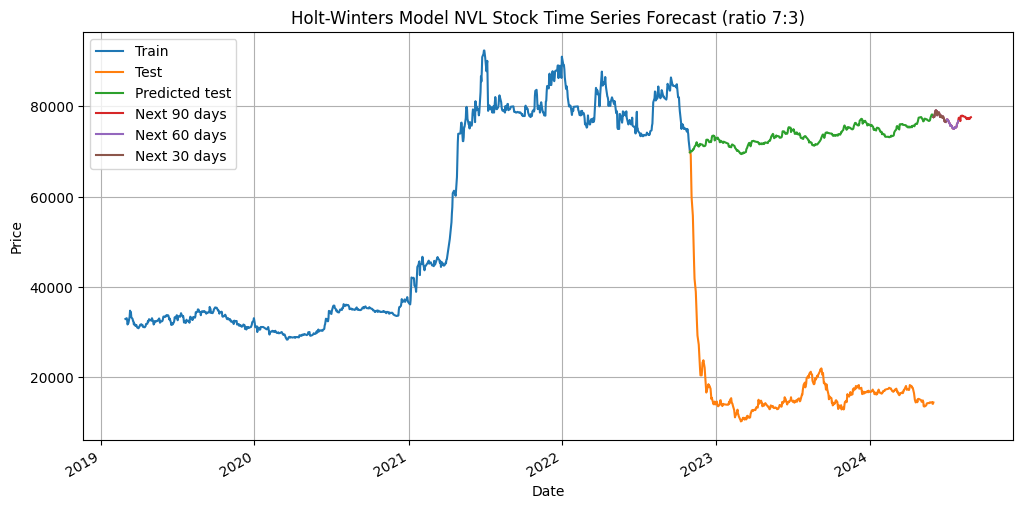

In [32]:
train_data['Price'].plot(legend=True, label='Train', figsize=(12,6))
test_data['Price'].plot(legend=True, label='Test')
test_data['Price Predicted'].plot(legend=True, label='Predicted test')

# Predict prices for the next 30 days
# Generate a range of dates for the next 30 days
next_30_days = pd.date_range(start=test_data.index[-1], periods=30)

# Predict the closing prices for the next 30 days
y_next_30_days = model.forecast(len(next_30_days) + len(test_data))[-30:]

# Predict prices for the next 60 days
next_60_days = pd.date_range(start=test_data.index[-1], periods=60)
y_next_60_days = model.forecast(len(next_60_days) + len(test_data))[-60:]

# Predict prices for the next 90 days
next_90_days = pd.date_range(start=test_data.index[-1], periods=90)
y_next_90_days = model.forecast(len(next_90_days) + len(test_data))[-90:]

plt.plot(next_90_days, y_next_90_days, label='Next 90 days')
plt.plot(next_60_days, y_next_60_days, label='Next 60 days')
plt.plot(next_30_days, y_next_30_days, label='Next 30 days')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Holt-Winters Model NVL Stock Time Series Forecast (ratio 7:3)')
plt.legend()
plt.grid(True)
plt.show()

In [33]:
# Calculate RMSE for the testing set
test_rmse = np.sqrt(np.mean((test_data['Price Predicted'] - test_data['Price'])**2))
print('Testing RMSE:', test_rmse)

# Calculate MAPE for the testing set
test_mape = np.mean(np.abs((test_data['Price'] - test_data['Price Predicted']) / test_data['Price'])) * 100
print("Testing MAPE:", test_mape)

# Calculate MAE for the testing set
test_mae = np.mean(np.abs(test_data['Price Predicted'] - test_data['Price']))
print("Testing MAE:", test_mae)

Testing RMSE: 57211.64689674073
Testing MAPE: 369.002776919441
Testing MAE: 56619.60814327329


#### Ratio 8:2

In [34]:
train_size = round(len(data) * 0.8)
test_size = round(len(data) - train_size)

len(data), train_size, test_size

(1313, 1050, 263)

In [35]:
train_data = data[:train_size]
test_data = data[train_size:]

train_data.shape, test_data.shape

((1050, 6), (263, 6))

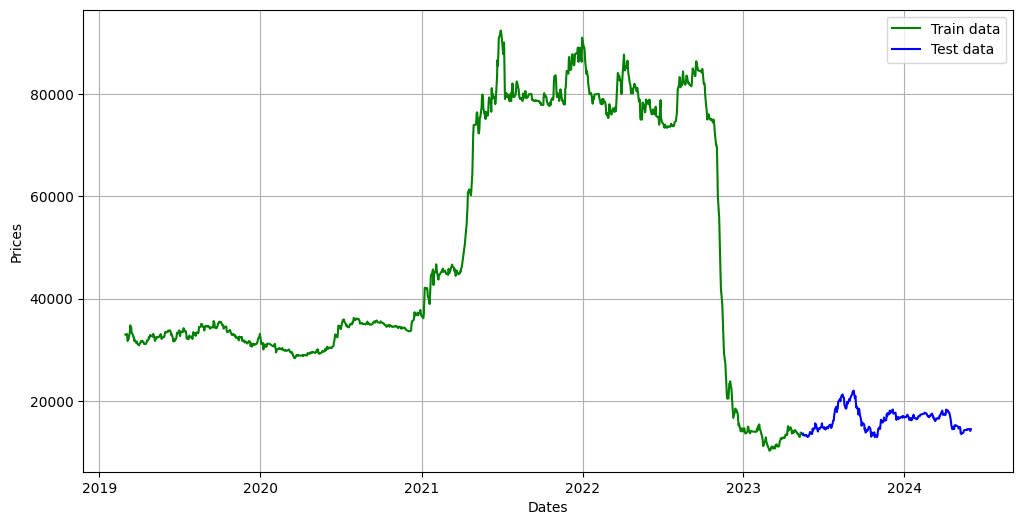

In [36]:
plt.figure(figsize=(12,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(train_data['Price'], 'green', label='Train data')
plt.plot(test_data['Price'], 'blue', label='Test data')
plt.legend()

In [37]:
model = ExponentialSmoothing(np.asarray(train_data['Price']), trend='add', seasonal='add', seasonal_periods=120).fit()

d:\LearnPython\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [38]:
test_data['Price Predicted'] = model.forecast(len(test_data))

C:\Users\KIm Anh\AppData\Local\Temp\ipykernel_18784\2474305646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Price Predicted'] = model.forecast(len(test_data))


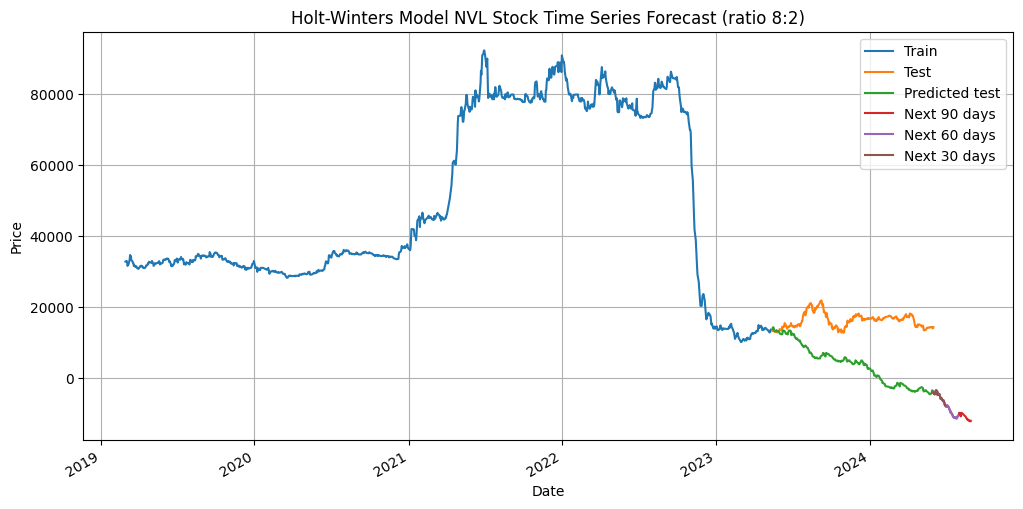

In [39]:
train_data['Price'].plot(legend=True, label='Train', figsize=(12,6))
test_data['Price'].plot(legend=True, label='Test')
test_data['Price Predicted'].plot(legend=True, label='Predicted test')

# Predict prices for the next 30 days
# Generate a range of dates for the next 30 days
next_30_days = pd.date_range(start=test_data.index[-1], periods=30)

# Predict the closing prices for the next 30 days
y_next_30_days = model.forecast(len(next_30_days) + len(test_data))[-30:]

# Predict prices for the next 60 days
next_60_days = pd.date_range(start=test_data.index[-1], periods=60)
y_next_60_days = model.forecast(len(next_60_days) + len(test_data))[-60:]

# Predict prices for the next 90 days
next_90_days = pd.date_range(start=test_data.index[-1], periods=90)
y_next_90_days = model.forecast(len(next_90_days) + len(test_data))[-90:]

plt.plot(next_90_days, y_next_90_days, label='Next 90 days')
plt.plot(next_60_days, y_next_60_days, label='Next 60 days')
plt.plot(next_30_days, y_next_30_days, label='Next 30 days')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Holt-Winters Model NVL Stock Time Series Forecast (ratio 8:2)')
plt.legend()
plt.grid(True)
plt.show()

In [40]:
# Calculate RMSE for the testing set
test_rmse = np.sqrt(np.mean((test_data['Price Predicted'] - test_data['Price'])**2))
print('Testing RMSE:', test_rmse)

# Calculate MAPE for the testing set
test_mape = np.mean(np.abs((test_data['Price'] - test_data['Price Predicted']) / test_data['Price'])) * 100
print("Testing MAPE:", test_mape)

# Calculate MAE for the testing set
test_mae = np.mean(np.abs(test_data['Price Predicted'] - test_data['Price']))
print("Testing MAE:", test_mae)

Testing RMSE: 13646.233523303486
Testing MAPE: 73.69402134895876
Testing MAE: 12176.382039958828


#### Ratio 9:1

In [41]:
train_size = round(len(data) * 0.9)
test_size = round(len(data) - train_size)

len(data), train_size, test_size

(1313, 1182, 131)

In [42]:
train_data = data[:train_size]
test_data = data[train_size:]

train_data.shape, test_data.shape

((1182, 6), (131, 6))

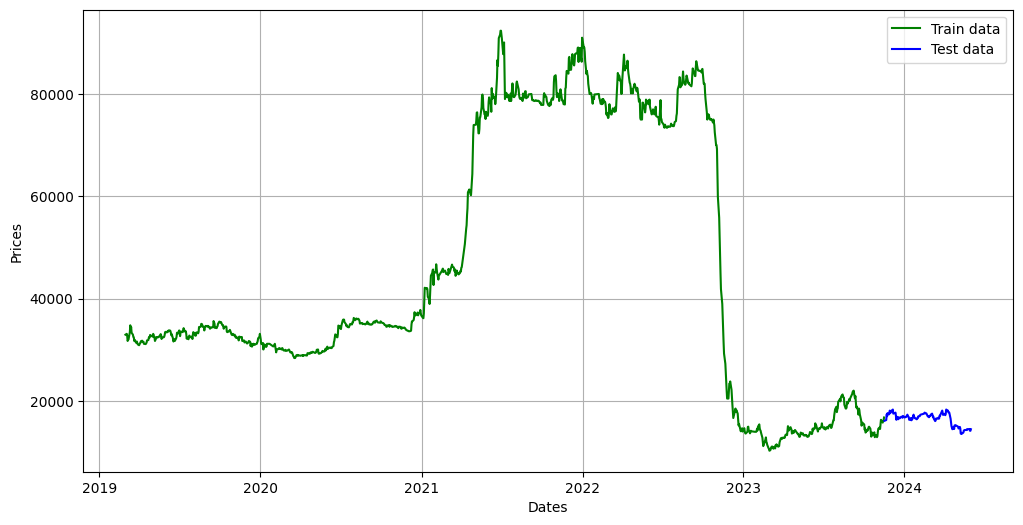

In [43]:
plt.figure(figsize=(12,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(train_data['Price'], 'green', label='Train data')
plt.plot(test_data['Price'], 'blue', label='Test data')
plt.legend()

In [44]:
model = ExponentialSmoothing(np.asarray(train_data['Price']), trend='add', seasonal='add', seasonal_periods=120).fit()

d:\LearnPython\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [45]:
test_data['Price Predicted'] = model.forecast(len(test_data))

C:\Users\KIm Anh\AppData\Local\Temp\ipykernel_18784\2474305646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Price Predicted'] = model.forecast(len(test_data))


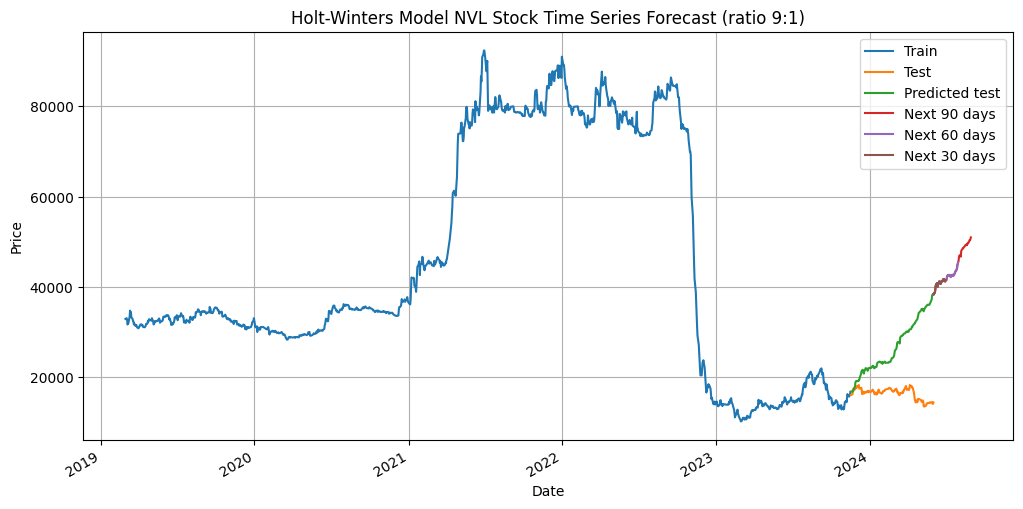

In [46]:
train_data['Price'].plot(legend=True, label='Train', figsize=(12,6))
test_data['Price'].plot(legend=True, label='Test')
test_data['Price Predicted'].plot(legend=True, label='Predicted test')

# Predict prices for the next 30 days
# Generate a range of dates for the next 30 days
next_30_days = pd.date_range(start=test_data.index[-1], periods=30)

# Predict the closing prices for the next 30 days
y_next_30_days = model.forecast(len(next_30_days) + len(test_data))[-30:]

# Predict prices for the next 60 days
next_60_days = pd.date_range(start=test_data.index[-1], periods=60)
y_next_60_days = model.forecast(len(next_60_days) + len(test_data))[-60:]

# Predict prices for the next 90 days
next_90_days = pd.date_range(start=test_data.index[-1], periods=90)
y_next_90_days = model.forecast(len(next_90_days) + len(test_data))[-90:]

plt.plot(next_90_days, y_next_90_days, label='Next 90 days')
plt.plot(next_60_days, y_next_60_days, label='Next 60 days')
plt.plot(next_30_days, y_next_30_days, label='Next 30 days')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Holt-Winters Model NVL Stock Time Series Forecast (ratio 9:1)')
plt.legend()
plt.grid(True)
plt.show()

In [47]:
# Calculate RMSE for the testing set
test_rmse = np.sqrt(np.mean((test_data['Price Predicted'] - test_data['Price'])**2))
print('Testing RMSE:', test_rmse)

# Calculate MAPE for the testing set
test_mape = np.mean(np.abs((test_data['Price'] - test_data['Price Predicted']) / test_data['Price'])) * 100
print("Testing MAPE:", test_mape)

# Calculate MAE for the testing set
test_mae = np.mean(np.abs(test_data['Price Predicted'] - test_data['Price']))
print("Testing MAE:", test_mae)

Testing RMSE: 12316.628557447852
Testing MAPE: 65.17944112861021
Testing MAE: 10243.774257843035


### Dataset: NLG Historical Data

In [48]:
data = pd.read_csv('../Datasets/3 - NLG Historical Data.csv')
data = data.dropna()

data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')
data = data.set_index('Date')
data = data.sort_index()

# Format column "Price", "Open", "High", "Low"
for col in ['Price', 'Open', 'High', 'Low']:
    data[col] = data[col].str.replace(',', '').astype(float)

data

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2019-03-01,18706.8,18496.6,18776.9,18496.6,365.80K,1.14%
2019-03-04,19127.2,18706.8,19127.2,18636.7,1.08M,2.25%
2019-03-05,18917.0,19127.2,19127.2,18846.9,468.76K,-1.10%
2019-03-06,18846.9,18987.1,19057.1,18811.9,225.18K,-0.37%
2019-03-07,18706.8,18846.9,18987.1,18671.8,453.92K,-0.74%
...,...,...,...,...,...,...
2024-05-27,43900.0,43900.0,44200.0,43000.0,1.56M,0.00%
2024-05-28,43701.0,43404.0,44047.0,43108.0,2.20M,-0.45%
2024-05-29,44400.0,43900.0,44600.0,43500.0,2.84M,1.60%


#### Ratio 7:3

In [49]:
train_size = round(len(data) * 0.7)
test_size = round(len(data) - train_size)

len(data), train_size, test_size

(1313, 919, 394)

In [50]:
train_data = data[:train_size]
test_data = data[train_size:]

train_data.shape, test_data.shape

((919, 6), (394, 6))

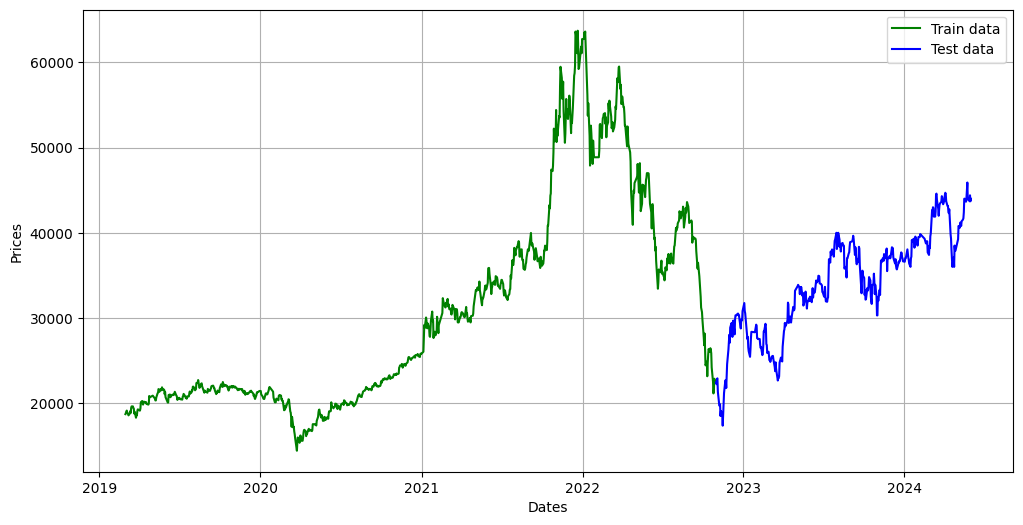

In [51]:
plt.figure(figsize=(12,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(train_data['Price'], 'green', label='Train data')
plt.plot(test_data['Price'], 'blue', label='Test data')
plt.legend()

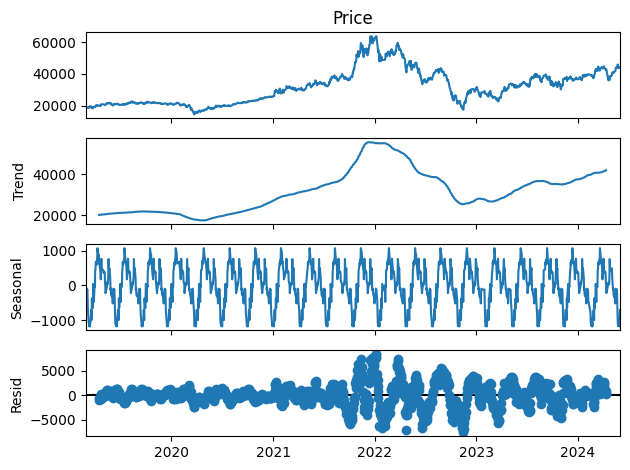

In [52]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Perform seasonal decomposition
result = seasonal_decompose(data['Price'], model='additive', period=65).plot();

In [53]:
model = ExponentialSmoothing(np.asarray(train_data['Price']), trend='add', seasonal='add', seasonal_periods=65).fit()

d:\LearnPython\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [54]:
test_data['Price Predicted'] = model.forecast(len(test_data))

C:\Users\KIm Anh\AppData\Local\Temp\ipykernel_18784\2474305646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Price Predicted'] = model.forecast(len(test_data))


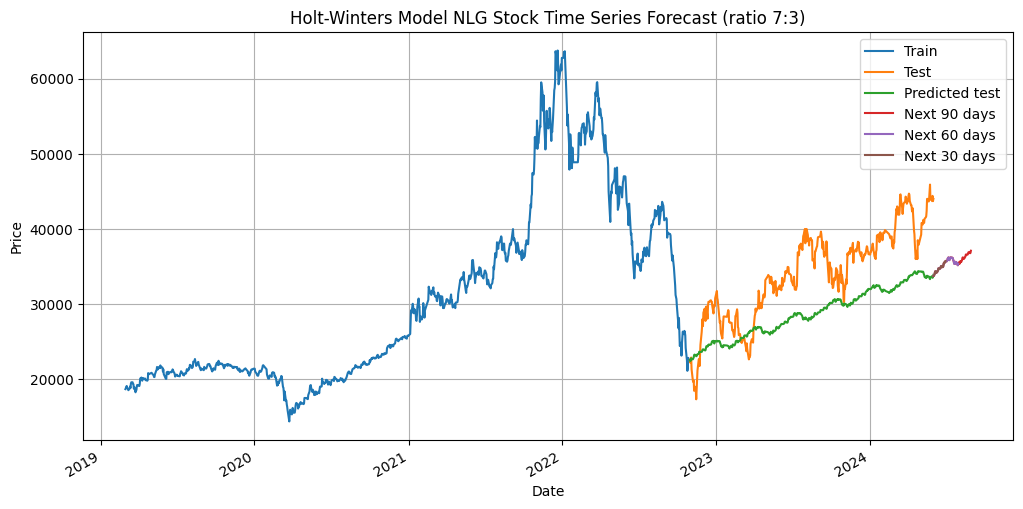

In [55]:
train_data['Price'].plot(legend=True, label='Train', figsize=(12,6))
test_data['Price'].plot(legend=True, label='Test')
test_data['Price Predicted'].plot(legend=True, label='Predicted test')

# Predict prices for the next 30 days
# Generate a range of dates for the next 30 days
next_30_days = pd.date_range(start=test_data.index[-1], periods=30)

# Predict the closing prices for the next 30 days
y_next_30_days = model.forecast(len(next_30_days) + len(test_data))[-30:]

# Predict prices for the next 60 days
next_60_days = pd.date_range(start=test_data.index[-1], periods=60)
y_next_60_days = model.forecast(len(next_60_days) + len(test_data))[-60:]

# Predict prices for the next 90 days
next_90_days = pd.date_range(start=test_data.index[-1], periods=90)
y_next_90_days = model.forecast(len(next_90_days) + len(test_data))[-90:]

plt.plot(next_90_days, y_next_90_days, label='Next 90 days')
plt.plot(next_60_days, y_next_60_days, label='Next 60 days')
plt.plot(next_30_days, y_next_30_days, label='Next 30 days')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Holt-Winters Model NLG Stock Time Series Forecast (ratio 7:3)')
plt.legend()
plt.grid(True)
plt.show()

In [56]:
# Calculate RMSE for the testing set
test_rmse = np.sqrt(np.mean((test_data['Price Predicted'] - test_data['Price'])**2))
print('Testing RMSE:', test_rmse)

# Calculate MAPE for the testing set
test_mape = np.mean(np.abs((test_data['Price'] - test_data['Price Predicted']) / test_data['Price'])) * 100
print("Testing MAPE:", test_mape)

# Calculate MAE for the testing set
test_mae = np.mean(np.abs(test_data['Price Predicted'] - test_data['Price']))
print("Testing MAE:", test_mae)

Testing RMSE: 6372.024649804893
Testing MAPE: 15.841707099997967
Testing MAE: 5645.488789749792


#### Ratio 8:2

In [57]:
train_size = round(len(data) * 0.8)
test_size = round(len(data) - train_size)

len(data), train_size, test_size

(1313, 1050, 263)

In [58]:
train_data = data[:train_size]
test_data = data[train_size:]

train_data.shape, test_data.shape

((1050, 6), (263, 6))

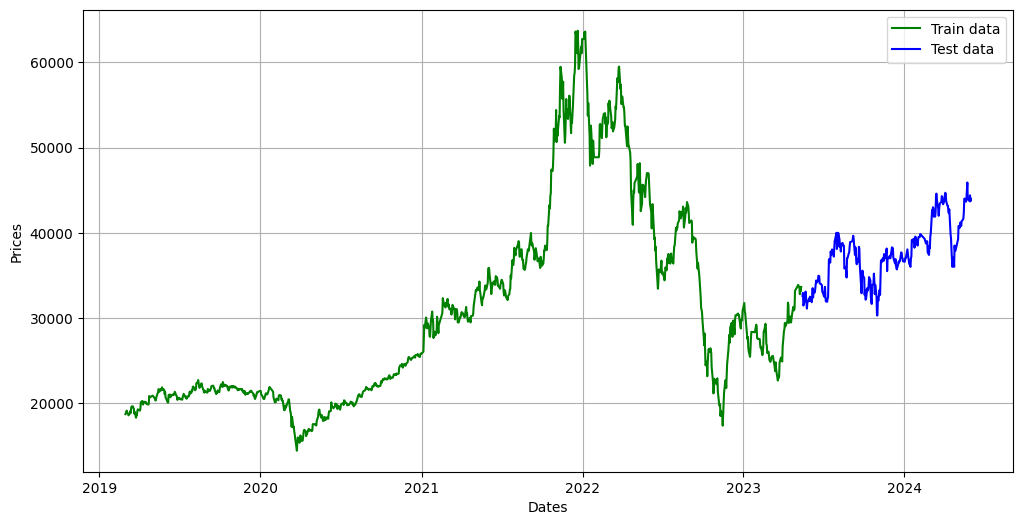

In [59]:
plt.figure(figsize=(12,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(train_data['Price'], 'green', label='Train data')
plt.plot(test_data['Price'], 'blue', label='Test data')
plt.legend()

In [60]:
model = ExponentialSmoothing(np.asarray(train_data['Price']), trend='add', seasonal='add', seasonal_periods=65).fit()

d:\LearnPython\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [61]:
test_data['Price Predicted'] = model.forecast(len(test_data))

C:\Users\KIm Anh\AppData\Local\Temp\ipykernel_18784\2474305646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Price Predicted'] = model.forecast(len(test_data))


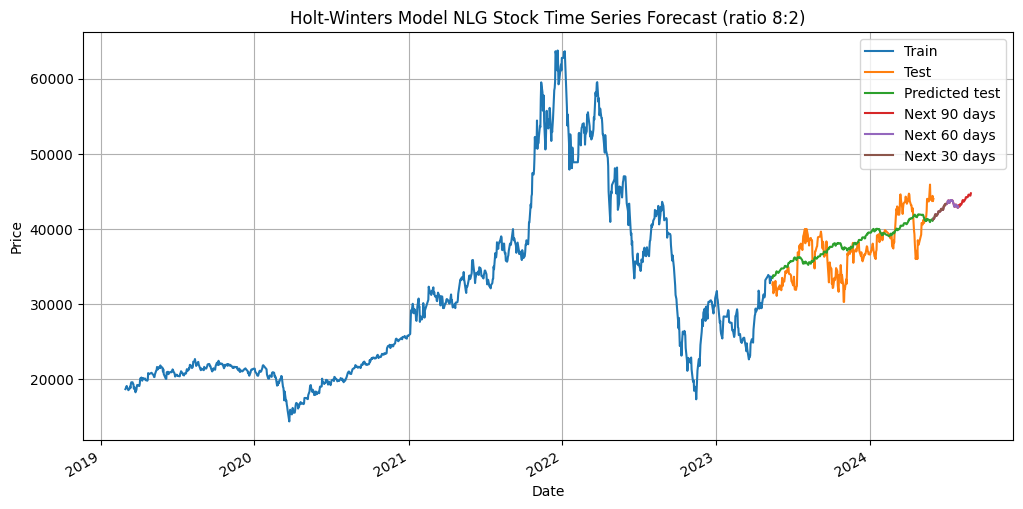

In [62]:
train_data['Price'].plot(legend=True, label='Train', figsize=(12,6))
test_data['Price'].plot(legend=True, label='Test')
test_data['Price Predicted'].plot(legend=True, label='Predicted test')

# Predict prices for the next 30 days
# Generate a range of dates for the next 30 days
next_30_days = pd.date_range(start=test_data.index[-1], periods=30)

# Predict the closing prices for the next 30 days
y_next_30_days = model.forecast(len(next_30_days) + len(test_data))[-30:]

# Predict prices for the next 60 days
next_60_days = pd.date_range(start=test_data.index[-1], periods=60)
y_next_60_days = model.forecast(len(next_60_days) + len(test_data))[-60:]

# Predict prices for the next 90 days
next_90_days = pd.date_range(start=test_data.index[-1], periods=90)
y_next_90_days = model.forecast(len(next_90_days) + len(test_data))[-90:]

plt.plot(next_90_days, y_next_90_days, label='Next 90 days')
plt.plot(next_60_days, y_next_60_days, label='Next 60 days')
plt.plot(next_30_days, y_next_30_days, label='Next 30 days')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Holt-Winters Model NLG Stock Time Series Forecast (ratio 8:2)')
plt.legend()
plt.grid(True)
plt.show()

In [63]:
# Calculate RMSE for the testing set
test_rmse = np.sqrt(np.mean((test_data['Price Predicted'] - test_data['Price'])**2))
print('Testing RMSE:', test_rmse)

# Calculate MAPE for the testing set
test_mape = np.mean(np.abs((test_data['Price'] - test_data['Price Predicted']) / test_data['Price'])) * 100
print("Testing MAPE:", test_mape)

# Calculate MAE for the testing set
test_mae = np.mean(np.abs(test_data['Price Predicted'] - test_data['Price']))
print("Testing MAE:", test_mae)

Testing RMSE: 2693.5206013435204
Testing MAPE: 6.166266983683869
Testing MAE: 2252.6366701561283


#### Ratio 9:1

In [64]:
train_size = round(len(data) * 0.9)
test_size = round(len(data) - train_size) 

len(data), train_size, test_size

(1313, 1182, 131)

In [65]:
train_data = data[:train_size]
test_data = data[train_size:]

train_data.shape, test_data.shape

((1182, 6), (131, 6))

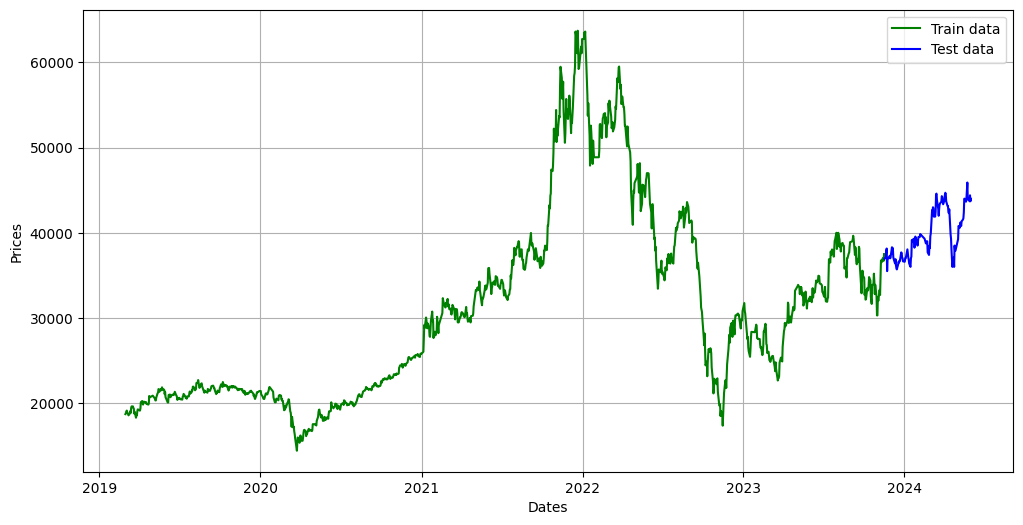

In [66]:
plt.figure(figsize=(12,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(train_data['Price'], 'green', label='Train data')
plt.plot(test_data['Price'], 'blue', label='Test data')
plt.legend()

In [67]:
model = ExponentialSmoothing(np.asarray(train_data['Price']), trend='add', seasonal='add', seasonal_periods=65).fit()

d:\LearnPython\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [68]:
test_data['Price Predicted'] = model.forecast(len(test_data))

C:\Users\KIm Anh\AppData\Local\Temp\ipykernel_18784\2474305646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Price Predicted'] = model.forecast(len(test_data))


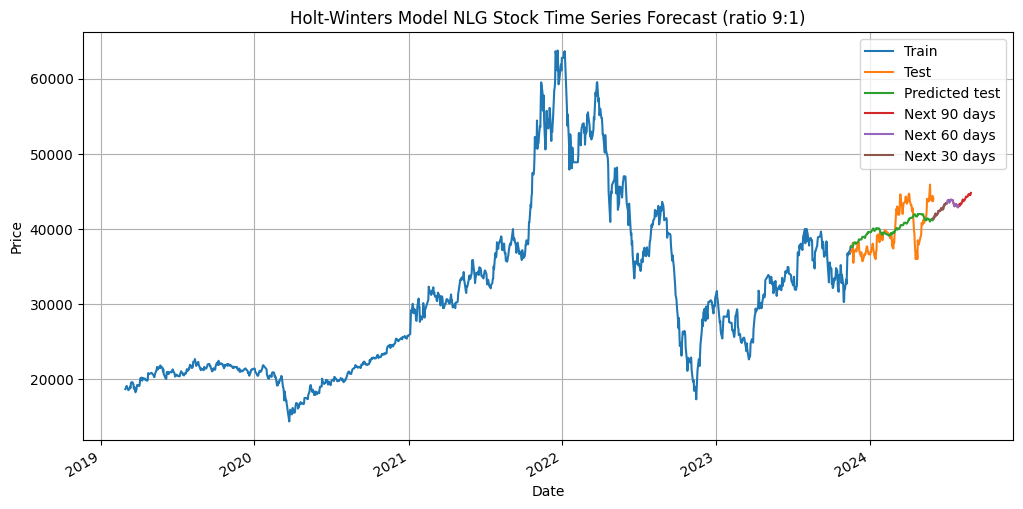

In [69]:
train_data['Price'].plot(legend=True, label='Train', figsize=(12,6))
test_data['Price'].plot(legend=True, label='Test')
test_data['Price Predicted'].plot(legend=True, label='Predicted test')

# Predict prices for the next 30 days
# Generate a range of dates for the next 30 days
next_30_days = pd.date_range(start=test_data.index[-1], periods=30)

# Predict the closing prices for the next 30 days
y_next_30_days = model.forecast(len(next_30_days) + len(test_data))[-30:]

# Predict prices for the next 60 days
next_60_days = pd.date_range(start=test_data.index[-1], periods=60)
y_next_60_days = model.forecast(len(next_60_days) + len(test_data))[-60:]

# Predict prices for the next 90 days
next_90_days = pd.date_range(start=test_data.index[-1], periods=90)
y_next_90_days = model.forecast(len(next_90_days) + len(test_data))[-90:]

plt.plot(next_90_days, y_next_90_days, label='Next 90 days')
plt.plot(next_60_days, y_next_60_days, label='Next 60 days')
plt.plot(next_30_days, y_next_30_days, label='Next 30 days')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Holt-Winters Model NLG Stock Time Series Forecast (ratio 9:1)')
plt.legend()
plt.grid(True)
plt.show()

In [70]:
# Calculate RMSE for the testing set
test_rmse = np.sqrt(np.mean((test_data['Price Predicted'] - test_data['Price'])**2))
print('Testing RMSE:', test_rmse)

# Calculate MAPE for the testing set
test_mape = np.mean(np.abs((test_data['Price'] - test_data['Price Predicted']) / test_data['Price'])) * 100
print("Testing MAPE:", test_mape)

# Calculate MAE for the testing set
test_mae = np.mean(np.abs(test_data['Price Predicted'] - test_data['Price']))
print("Testing MAE:", test_mae)

Testing RMSE: 2357.7373243313255
Testing MAPE: 4.981846059909978
Testing MAE: 1986.3085132237823
